<a href="https://colab.research.google.com/github/gulzat-dev/BIS/blob/main/2_ways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26099 sha256=bd9bca7231d938144aafcaf9e98ee73db4732ca5c38b299bb469d937c3758581
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
  Created wheel for stringdist: filename=StringDist-1.0.9-cp310-cp310-linux_x86_64.whl size=24953 sha256=1260a88127a3f4a40710947637ad45ab510591540975ba584eea5af4880c9d33
  Stored in directory: /root/.cache/pip/wheels/79/25/0a/4a0c2c7af31a8b473f6e10e30312396f31ae899722600d7b99
Successfully built intervaltree stringdist


In [ ]:
import tempfile
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualizer
from pm4py.visualization.petri_net import visualizer as pn_visualizer

from IPython.display import Image

from google.colab import drive
from pm4py.objects.log.importer.xes import importer as xes_importer



# Mount Google Drive
drive.mount('/content/drive')

file_name = 'BPI_Challenge_2019.xes'
file_path = f'/content/drive/MyDrive/files/{file_name}'

# Import the XES log file
log = xes_importer.apply(file_path)

# Discover the Directly-Follows Graph (DFG)
#dfg = dfg_discovery.apply(log)




Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/pm4py/util/dt_parsing/parser.py:76: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/251734 [00:00<?, ?it/s]

In [ ]:

len(log)
log_df = pm4py.convert_to_dataframe(log)



/usr/local/lib/python3.10/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [ ]:
len(log_df)


1595923

In [ ]:
log_df = log_df.drop_duplicates()
log_df.reset_index(drop=True, inplace=True)
len(log_df)


1463175

In [ ]:
log_df[:3]

,User,org:resource,concept:name,Cumulative net worth (EUR),time:timestamp,case:Spend area text,case:Company,case:Document Type,case:Sub spend area text,case:Purchasing Document,...,case:Vendor,case:Item Type,case:Item Category,case:Spend classification text,case:Source,case:Name,case:GR-Based Inv. Verif.,case:Item,case:concept:name,case:Goods Receipt
0,batch_00,batch_00,SRM: Created,298.0,2018-01-02 12:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,...,vendorID_0000,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True
1,batch_00,batch_00,SRM: Complete,298.0,2018-01-02 13:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,...,vendorID_0000,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True
2,batch_00,batch_00,SRM: Awaiting Approval,298.0,2018-01-02 13:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,...,vendorID_0000,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True


In [ ]:
filtered_dataframe = pm4py.filter_end_activities(log_df, ['Clear Invoice', 'Record Invoice Receipt', 'Record Goods Receipt', 'Delete Purchase Order Item', 'Remove Payment Block', 'Cancel Invoice Receipt', 'Change Approval for Purchase Order', 'Record Service Entry Sheet', 'Change Delivery Indicator', 'Change Price', 'Change Quantity', 'Cancel Goods Receipt', 'Receive Order Confirmation', 'Block Purchase Order Item', 'Vendor creates invoice', 'Set Payment Block', 'SRM: Change was Transmitted', 'SRM: Transfer Failed (E.Sys.)', 'SRM: In Transfer to Execution Syst.', 'Cancel Subsequent Invoice', 'Change Storage Location', 'Reactivate Purchase Order Item', 'Record Subsequent Invoice', 'SRM: Deleted', 'SRM: Transaction Completed', 'Vendor creates debit memo', 'Change Final Invoice Indicator', 'Update Order Confirmation', 'Change Currency', 'Release Purchase Order', 'Change payment term'], activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with the relevant data

# Specify the attribute key and its desired value for filtering
attribute_key = 'case:Item Category'
attribute_value = '2-way match'

# Filter the DataFrame based on the attribute value
filtered_df = filtered_dataframe[filtered_dataframe[attribute_key] == attribute_value]

# Print the filtered DataFrame
filtered_df[:5]
len(filtered_df)

5858

In [ ]:
print(pm4py.get_end_activities(log_df))
print(pm4py.get_end_activities(filtered_dataframe))

{'Clear Invoice': 181328, 'Record Invoice Receipt': 23091, 'Record Goods Receipt': 22776, 'Delete Purchase Order Item': 8123, 'Remove Payment Block': 5397, 'Create Purchase Order Item': 4447, 'Cancel Invoice Receipt': 1348, 'Change Approval for Purchase Order': 1346, 'Record Service Entry Sheet': 921, 'Change Delivery Indicator': 718, 'Change Price': 529, 'Change Quantity': 525, 'Cancel Goods Receipt': 440, 'Receive Order Confirmation': 232, 'Block Purchase Order Item': 167, 'Vendor creates invoice': 68, 'Set Payment Block': 61, 'SRM: Change was Transmitted': 47, 'SRM: Transfer Failed (E.Sys.)': 44, 'SRM: In Transfer to Execution Syst.': 30, 'Cancel Subsequent Invoice': 24, 'Change Storage Location': 20, 'Reactivate Purchase Order Item': 14, 'Record Subsequent Invoice': 9, 'SRM: Deleted': 9, 'SRM: Transaction Completed': 6, 'Vendor creates debit memo': 5, 'Change Final Invoice Indicator': 3, 'Update Order Confirmation': 3, 'Change Currency': 1, 'Release Purchase Order': 1, 'Change paym

In [ ]:
len(filtered_log)

0

In [ ]:
#just to reconvert
#logs = pm4py.convert_to_event_log(log_df)

In [ ]:
#filter by  filter_case_performance
import datetime

# Convert 2 years to milliseconds
two_years_ms = 2 * 365 * 24 * 60 * 60 * 1000

# Calculate the minimum duration in milliseconds
min_duration_ms = 1

# Convert the durations to timedelta objects
min_duration = datetime.timedelta(milliseconds=min_duration_ms)
max_duration = datetime.timedelta(milliseconds=two_years_ms)

# Filter the cases based on performance duration
filtered_log = pm4py.filter_case_performance(filtered_df, min_duration.total_seconds(), max_duration.total_seconds())

In [ ]:
# len(filtered_log)
# filtered_log = pm4py.filter_case_size(filtered_log, 2,1000)
len(filtered_log)

5858

In [ ]:
pm4py.write_xes(filtered_log, '/content/drive/MyDrive/files/exported_test_2way.xes')

exporting log, completed traces ::   0%|          | 0/1034 [00:00<?, ?it/s]

In [ ]:
print(filtered_log[:1])

        User org:resource  concept:name  Cumulative net worth (EUR)  \
12  batch_00     batch_00  SRM: Created                       557.0   

              time:timestamp case:Spend area text    case:Company  \
12 2018-01-03 08:49:00+00:00            Marketing  companyID_0000   

   case:Document Type    case:Sub spend area text case:Purchasing Document  \
12  EC Purchase order  Marketing Support Services               2000000001   

    ...    case:Vendor case:Item Type             case:Item Category  \
12  ...  vendorID_0001        Service  3-way match, invoice after GR   

   case:Spend classification text          case:Source    case:Name  \
12                            NPR  sourceSystemID_0000  vendor_0001   

   case:GR-Based Inv. Verif.  case:Item case:concept:name case:Goods Receipt  
12                      True      00001  2000000001_00001               True  

[1 rows x 21 columns]


# New Section

In [ ]:
from pm4py.visualization.dfg import visualizer as dfg_visualizer
dfg = dfg_discovery.apply(filtered_log)
min_connections = 10
max_connections = 10000

# Filter the DFG based on the number of connections
filtered_dfg = {}
for edge in dfg:
    if min_connections <= dfg[edge] <= max_connections:
        filtered_dfg[edge] = dfg[edge]

# Visualize the DFG
gviz = dfg_visualizer.apply(filtered_dfg)

# Save the goal diagram as an image file
output_file = '/content/drive/MyDrive/files/goal_diagram.png'
dfg_visualizer.save(gviz, output_file)

1456821

/usr/local/lib/python3.10/dist-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


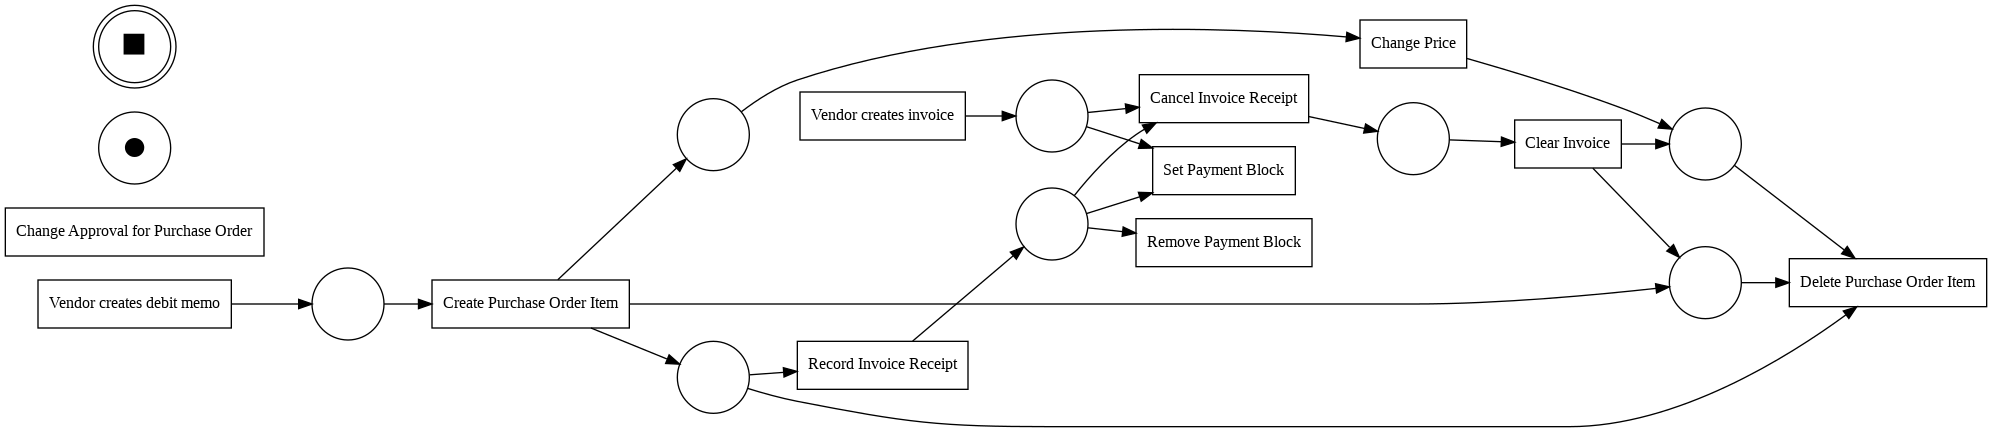

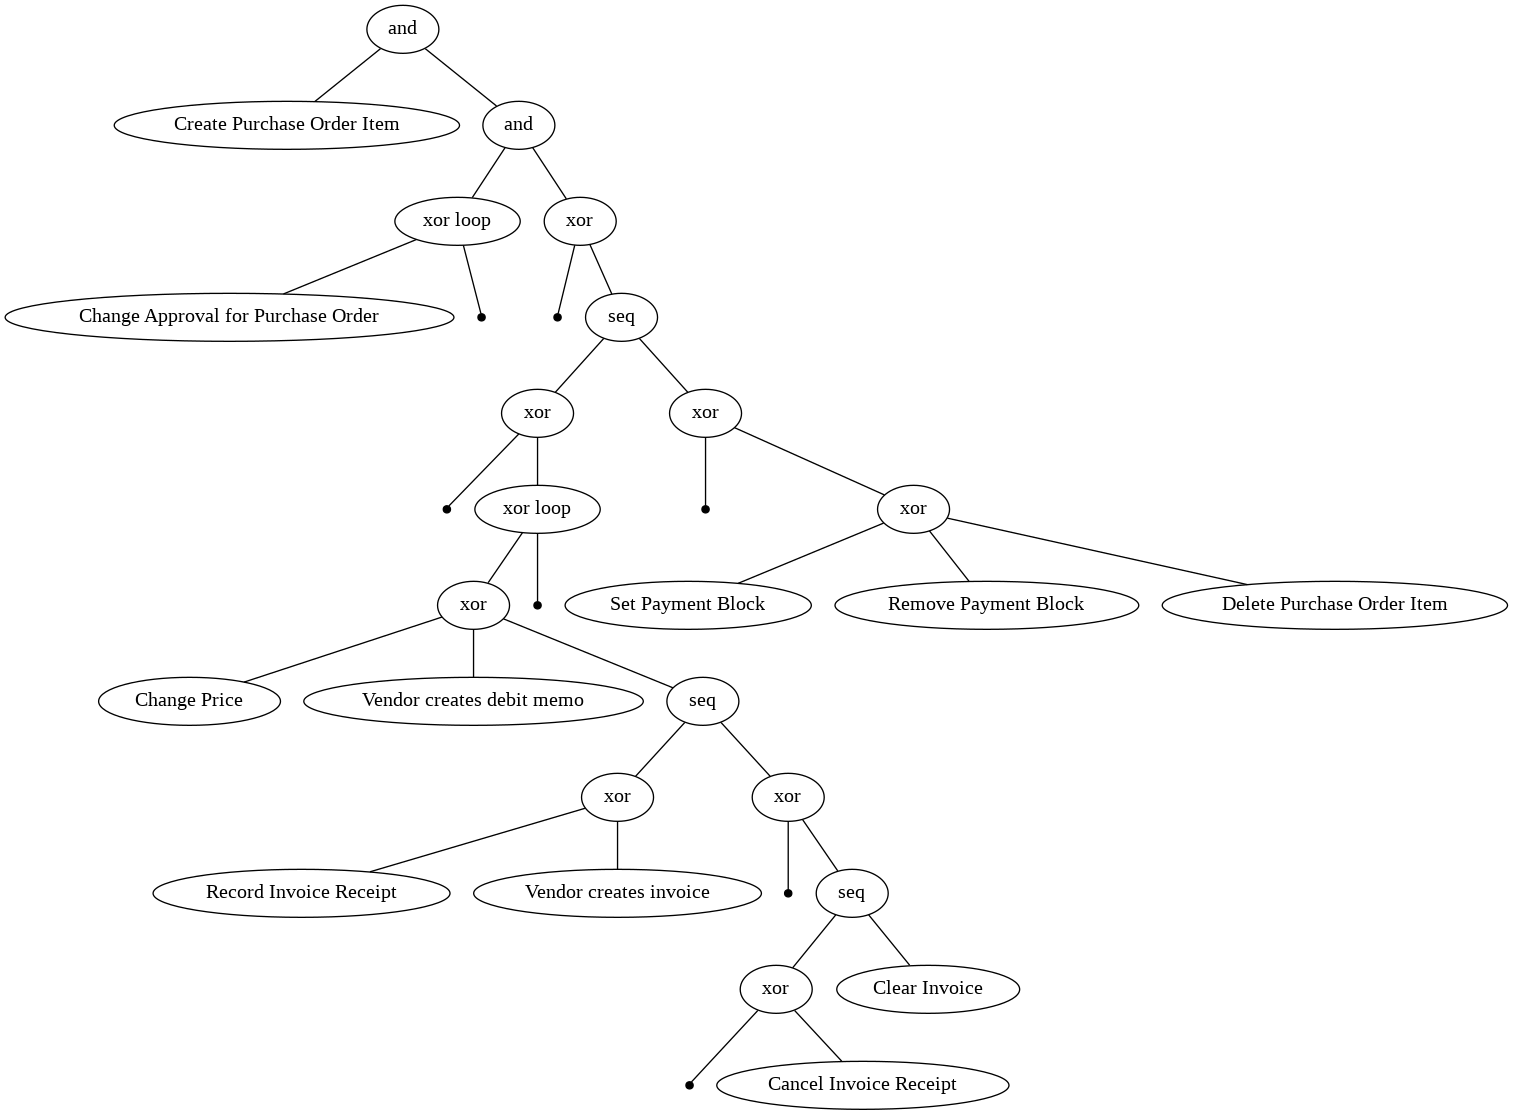

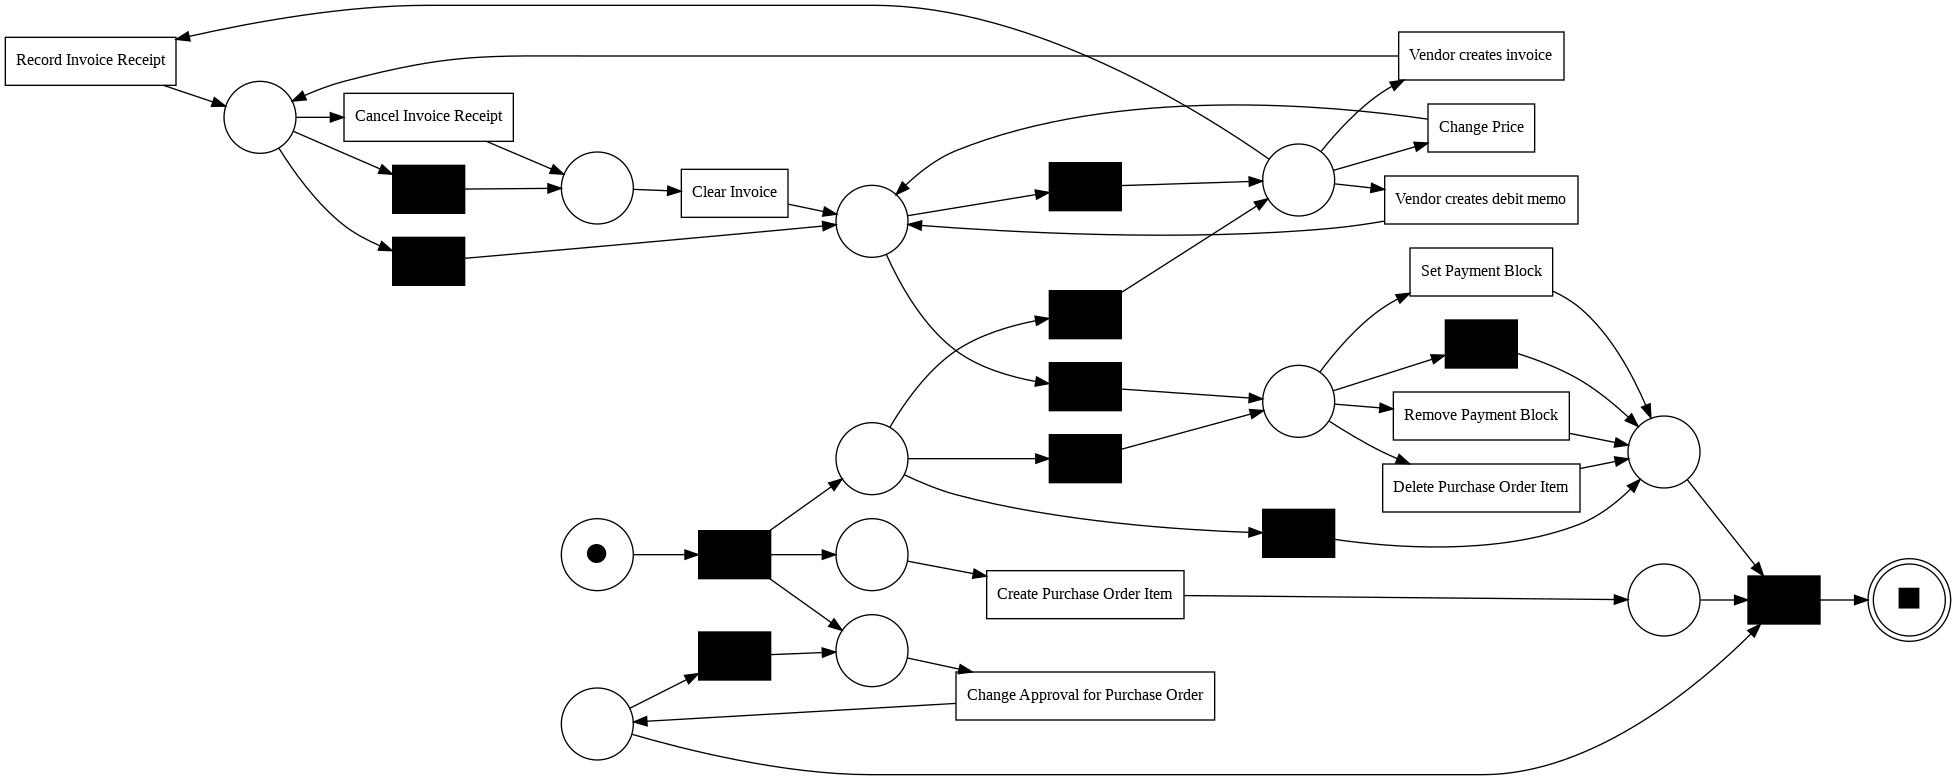

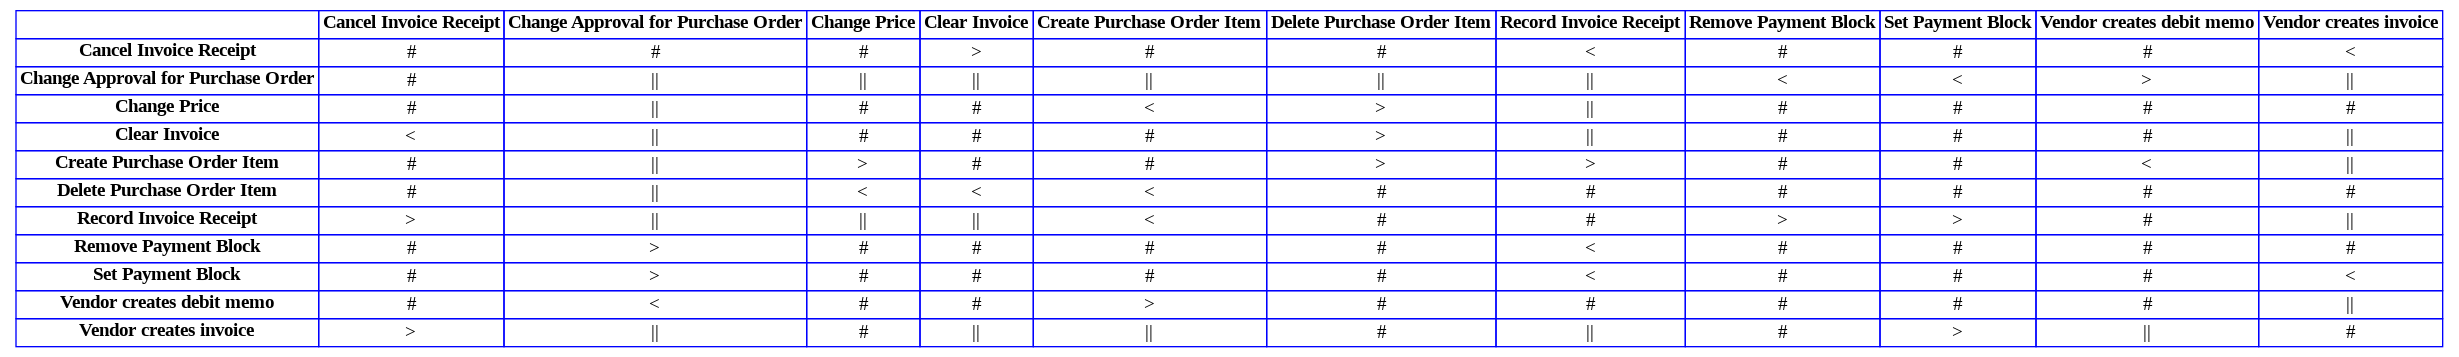

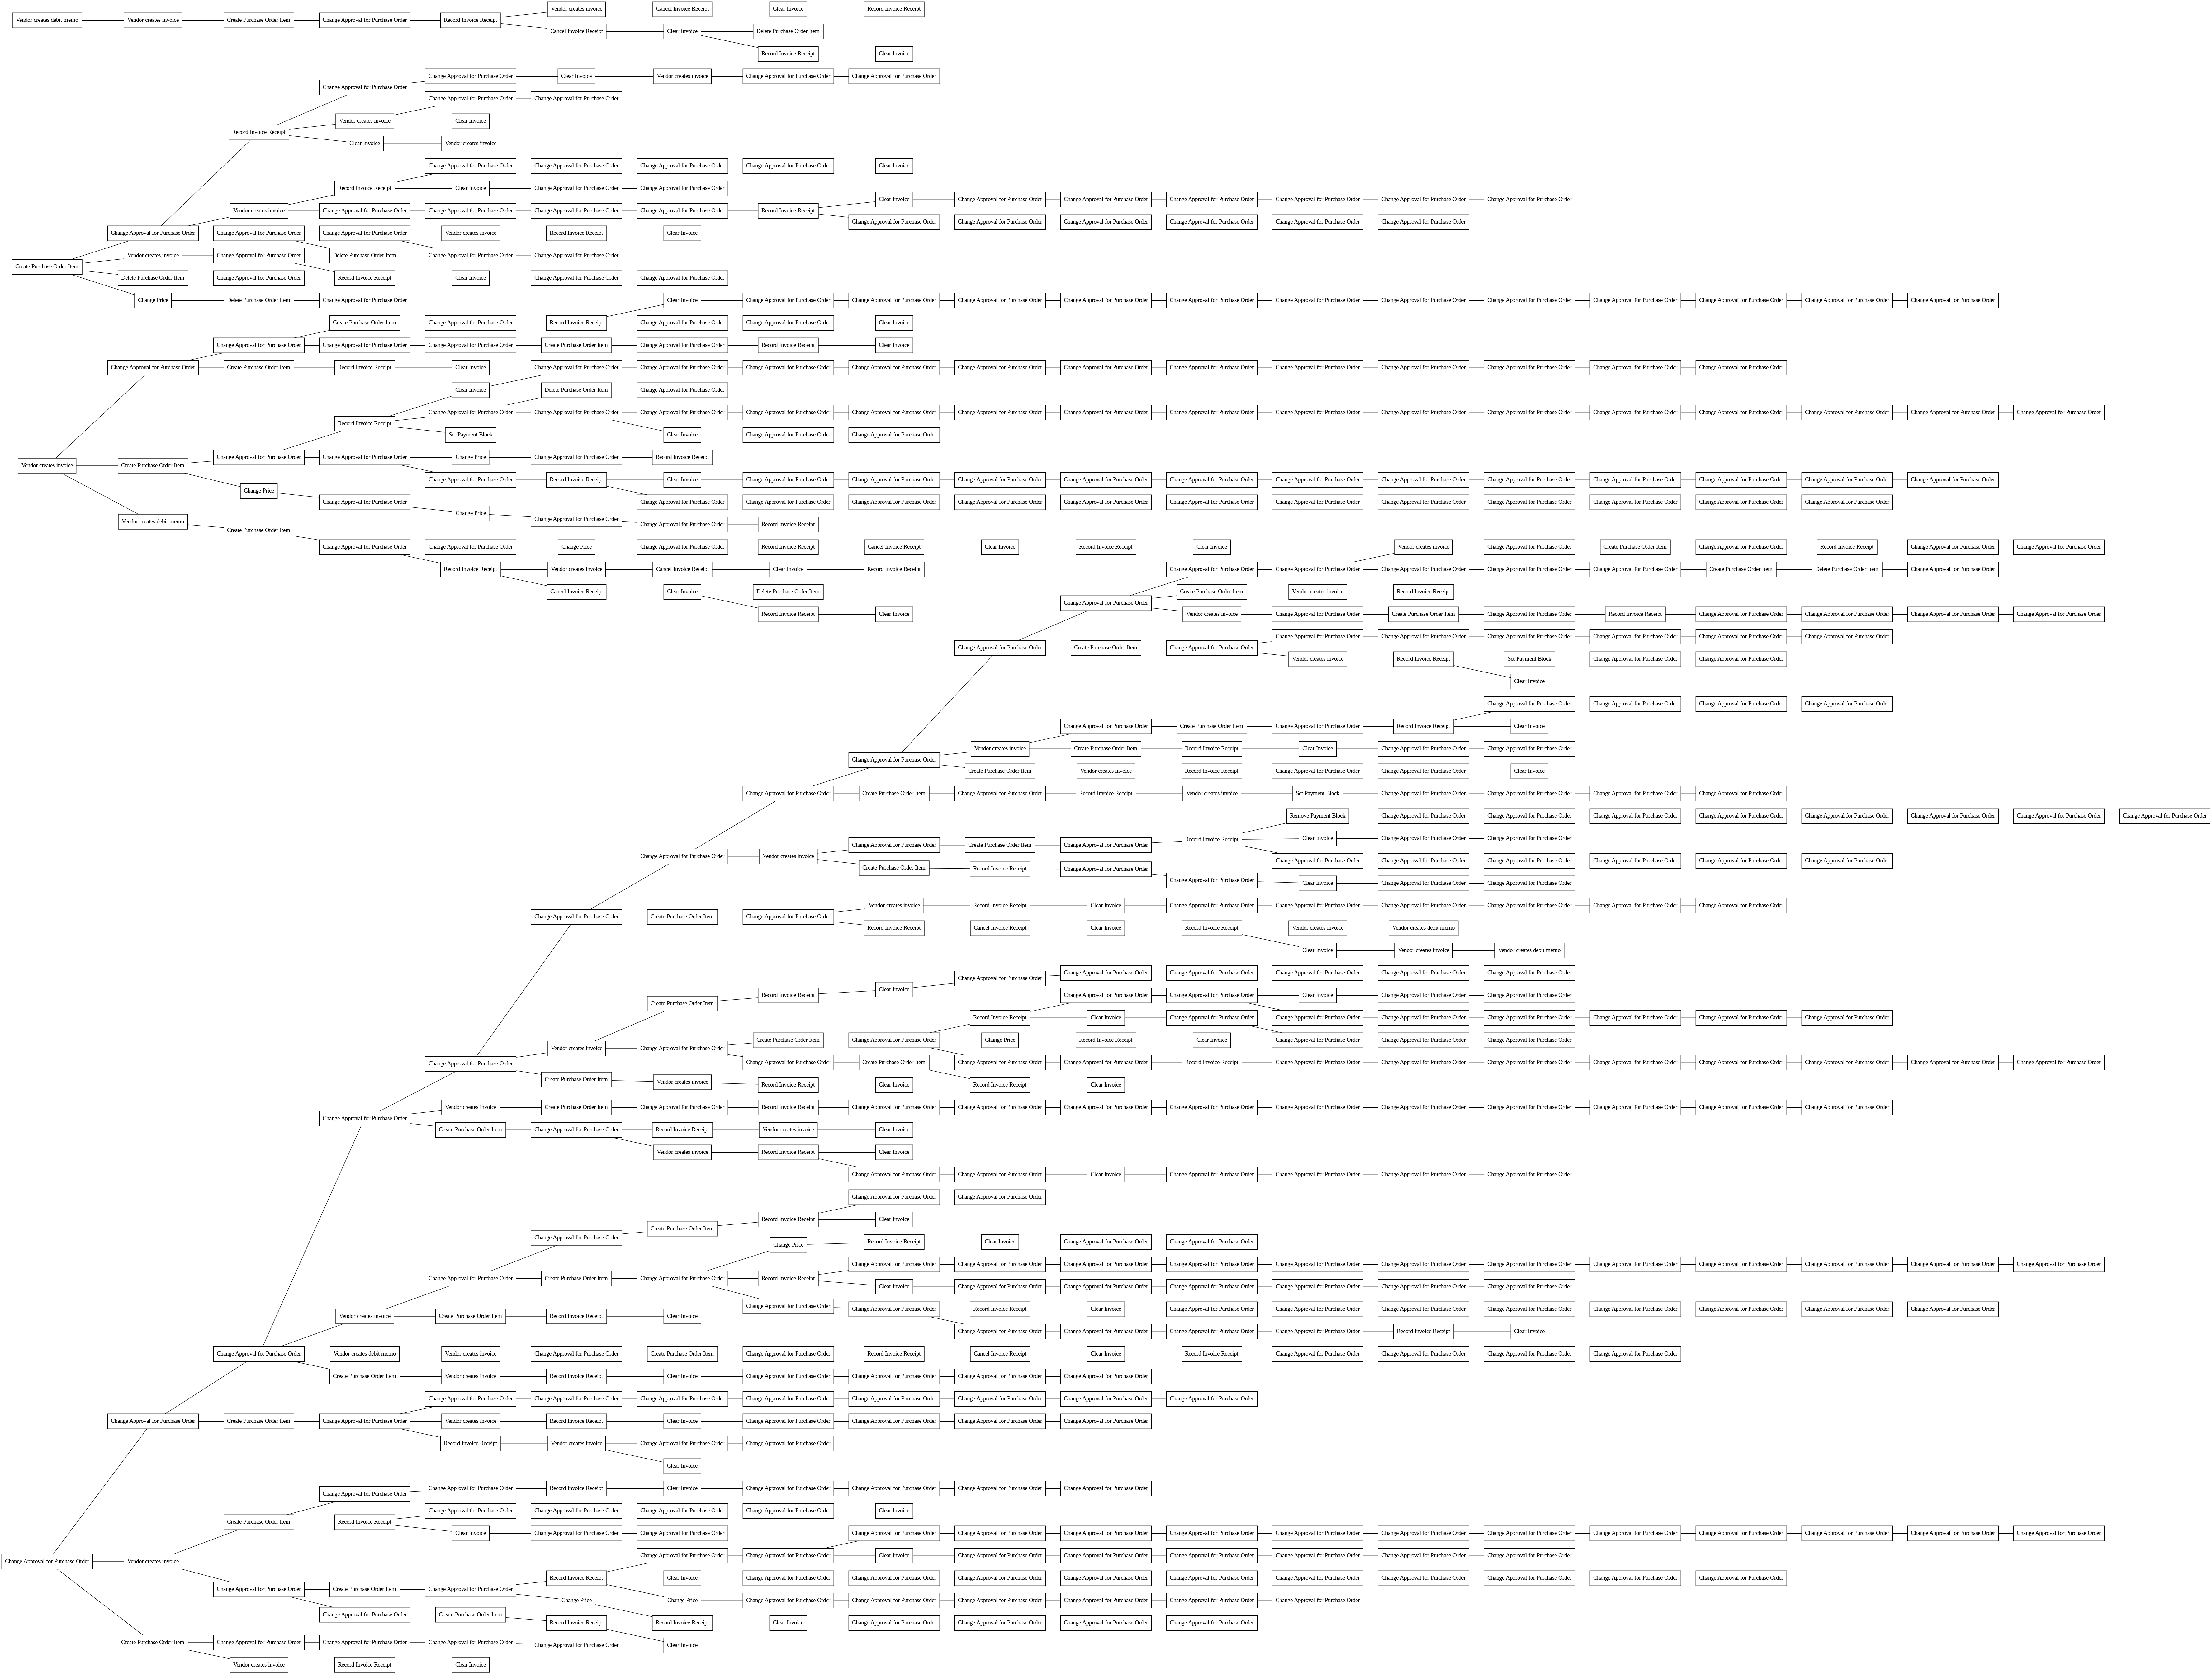

replaying log with TBR, completed variants ::   0%|          | 0/147 [00:00<?, ?it/s]

,trace_is_fit,trace_fitness,activated_transitions,reached_marking,enabled_transitions_in_marking,transitions_with_problems,missing_tokens,consumed_tokens,remaining_tokens,produced_tokens
0,True,1.0,"[(tau_1, None), (init_loop_13, None), (92867aa...",{sink: 1},{},[],0,20,0,20
1,True,1.0,"[(tau_1, None), (7303674f-446a-479e-be23-5c48c...",{sink: 1},{},[],0,20,0,20
2,True,1.0,"[(tau_1, None), (init_loop_13, None), (55bbb1f...",{sink: 1},{},[],0,22,0,22
3,True,1.0,"[(tau_1, None), (init_loop_13, None), (92867aa...",{sink: 1},{},[],0,22,0,22
4,True,1.0,"[(tau_1, None), (e708d957-b960-4835-bc03-e0ad1...",{sink: 1},{},[],0,8,0,8
...,...,...,...,...,...,...,...,...,...,...
1029,True,1.0,"[(tau_1, None), (e708d957-b960-4835-bc03-e0ad1...",{sink: 1},{},[],0,8,0,8
1030,True,1.0,"[(tau_1, None), (e708d957-b960-4835-bc03-e0ad1...",{sink: 1},{},[],0,8,0,8
1031,True,1.0,"[(tau_1, None), (e708d957-b960-4835-bc03-e0ad1...",{sink: 1},{},[],0,8,0,8
1032,True,1.0,"[(tau_1, None), (e708d957-b960-4835-bc03-e0ad1...",{sink: 1},{},[],0,8,0,8


In [ ]:
import pandas as pd

## Import the dfg_discovery algorithm
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
## Import the dfg visualization object
from pm4py.visualization.dfg import visualizer as dfg_visualization
#Create graph from log
#filtered_dataframe = pm4py.filter_time_range(filtered_dataframe, "2018-01-01 00:00:00", "2020-01-01 00:00:00", mode='traces_contained')
dfg = dfg_discovery.apply(filtered_dataframe)
# min_connections = 10
# max_connections = 10000

# # Filter the DFG based on the number of connections
# filtered_dfg = {}
# for edge in dfg:
#     if min_connections <= dfg[edge] <= max_connections:
#         filtered_dfg[edge] = dfg[edge]



# # Visualise
# gviz = dfg_visualization.apply(dfg, log=filtered_log, variant=dfg_visualization.Variants.FREQUENCY)
# dfg_visualization.view(gviz)

## Alpha_miner algorithm
net, im, fm = pm4py.discover_petri_net_alpha(filtered_log)

# Visualise
pm4py.view_petri_net(net, im, fm, format='png')

# Discover process tree using inductive miner
process_tree = pm4py.discover_process_tree_inductive(filtered_log)

pm4py.view_process_tree(process_tree, format='png')

# Discover petri net using inductive miner
net, im, fm = pm4py.discover_petri_net_inductive(filtered_log)

pm4py.view_petri_net(net, im, fm, format='png')

footprints = pm4py.discover_footprints(filtered_log)
pm4py.view_footprints(footprints, format='png')

prefix_tree = pm4py.discover_prefix_tree(filtered_log)
pm4py.view_prefix_tree(prefix_tree, format='png')
#filtered_dataframe
tbr_diagnostics = pm4py.conformance_diagnostics_token_based_replay(filtered_log, net, im, fm)
diagnostics_df = pd.DataFrame.from_dict(tbr_diagnostics)

diagnostics_df

In [ ]:
from pm4py.algo.filtering.log.variants import variants_filter
variant_dom_decl = variants_filter.get_variants(filtered_log)

In [ ]:
from pm4py.statistics.traces.generic.log import case_statistics
variants_count = case_statistics.get_variant_statistics(filtered_log)

In [ ]:
len(variants_count)

147

In [ ]:
variant_distr = []
for variant in variants_count:
  variant_distr.append(variant['count'])

[226, 217, 93, 76, 32, 23, 23, 15, 15, 14, 14, 13, 12, 11, 11, 10, 8, 8, 6, 6, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


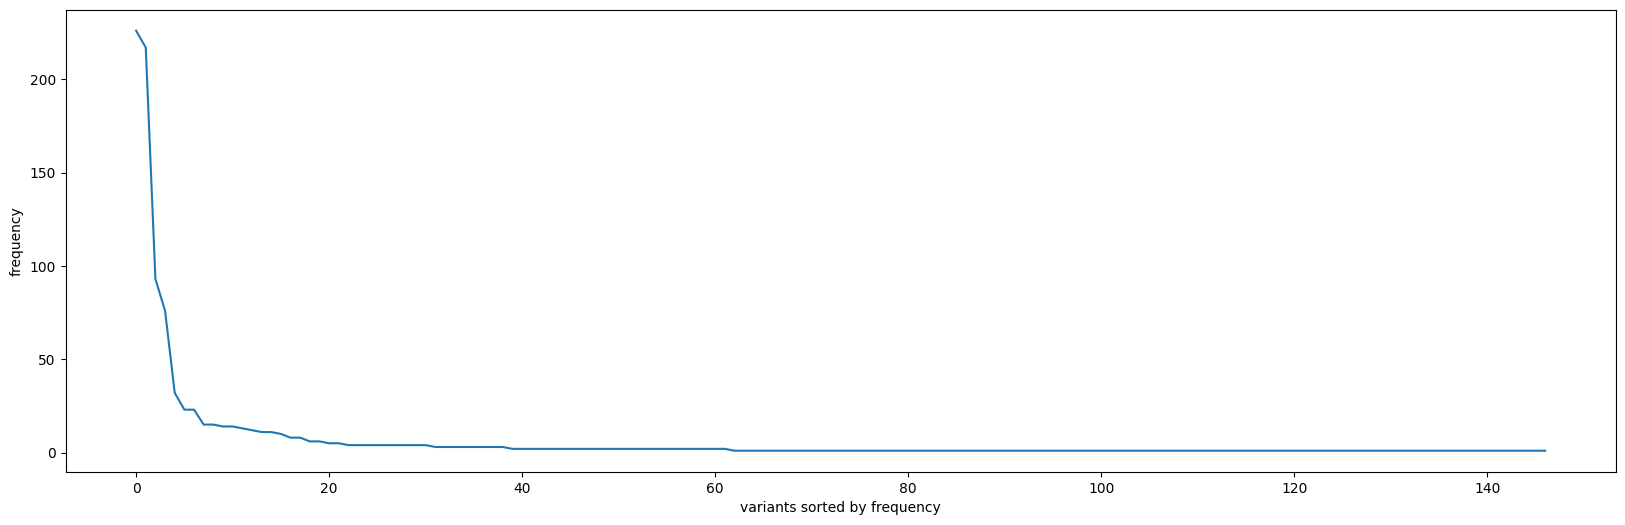

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20, 6))
print(variant_distr)

#plt.hist(profile['Duration'].values, color = 'orange')
plt.plot(variant_distr)
plt.xlabel('variants sorted by frequency')
plt.ylabel('frequency')
plt.show()

In [ ]:

from pm4py.objects.petri_net.importer import importer as pnml_importer

## Import the alpha_miner algorithm
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(filtered_log)

replaying log with TBR, completed variants ::   0%|          | 0/147 [00:00<?, ?it/s]

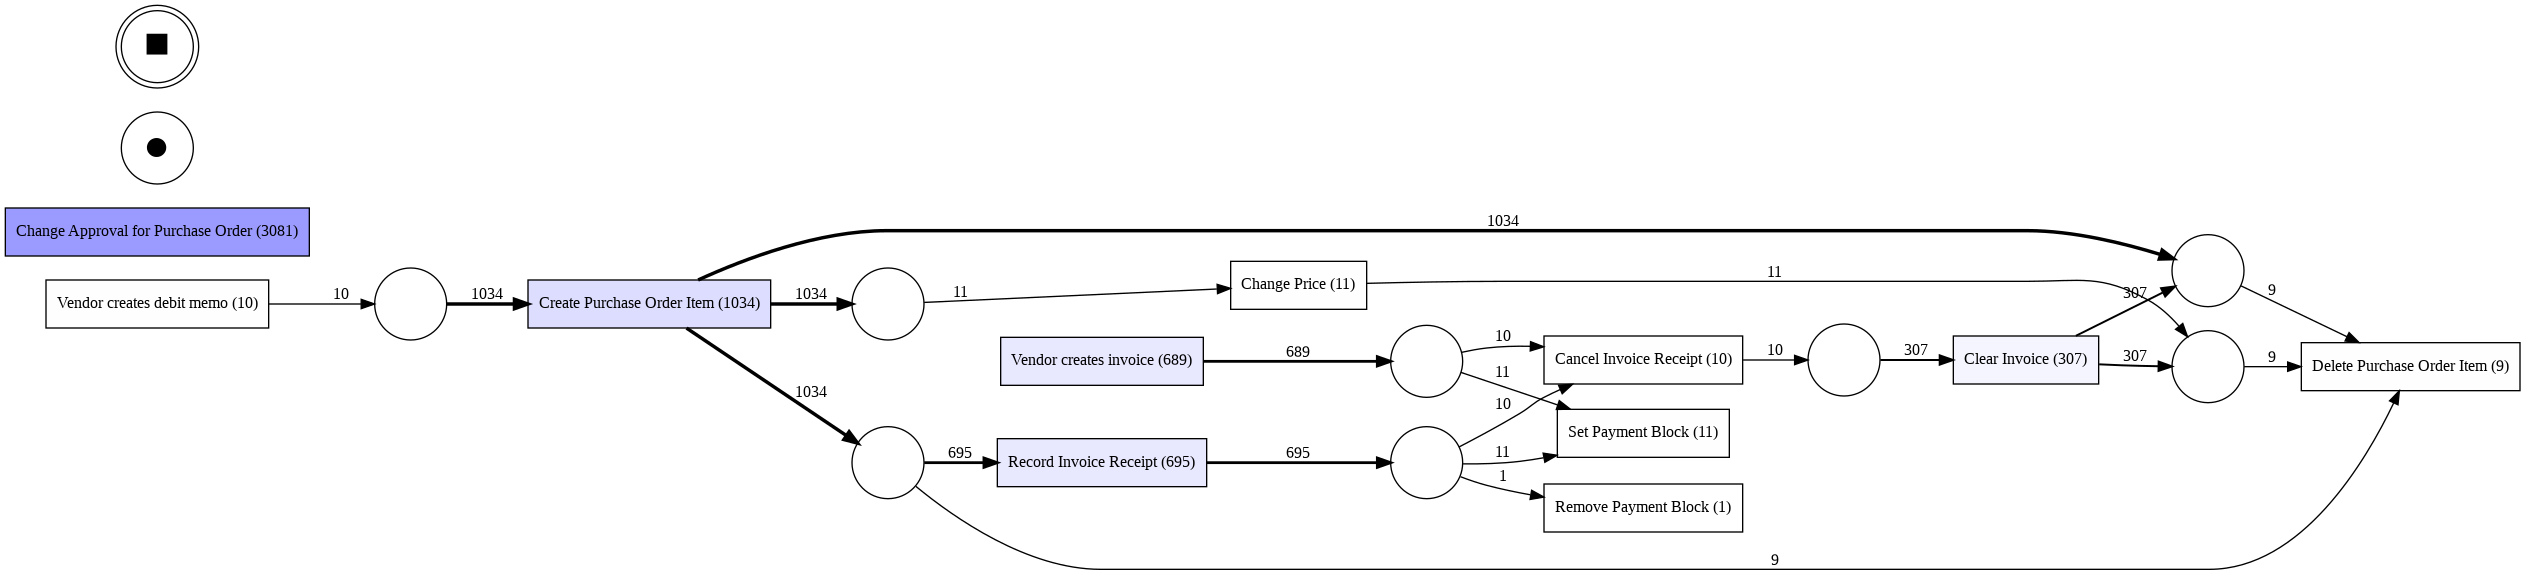

In [ ]:
## Import the petrinet visualizer object
from pm4py.visualization.petri_net import visualizer as pn_visualizer
# Visualise
gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, parameters={alpha_miner.Variants..value.Parameters.START_TIMESTAMP_KEY:'0:0:0'}, log=filtered_log)
pn_visualizer.view(gviz)

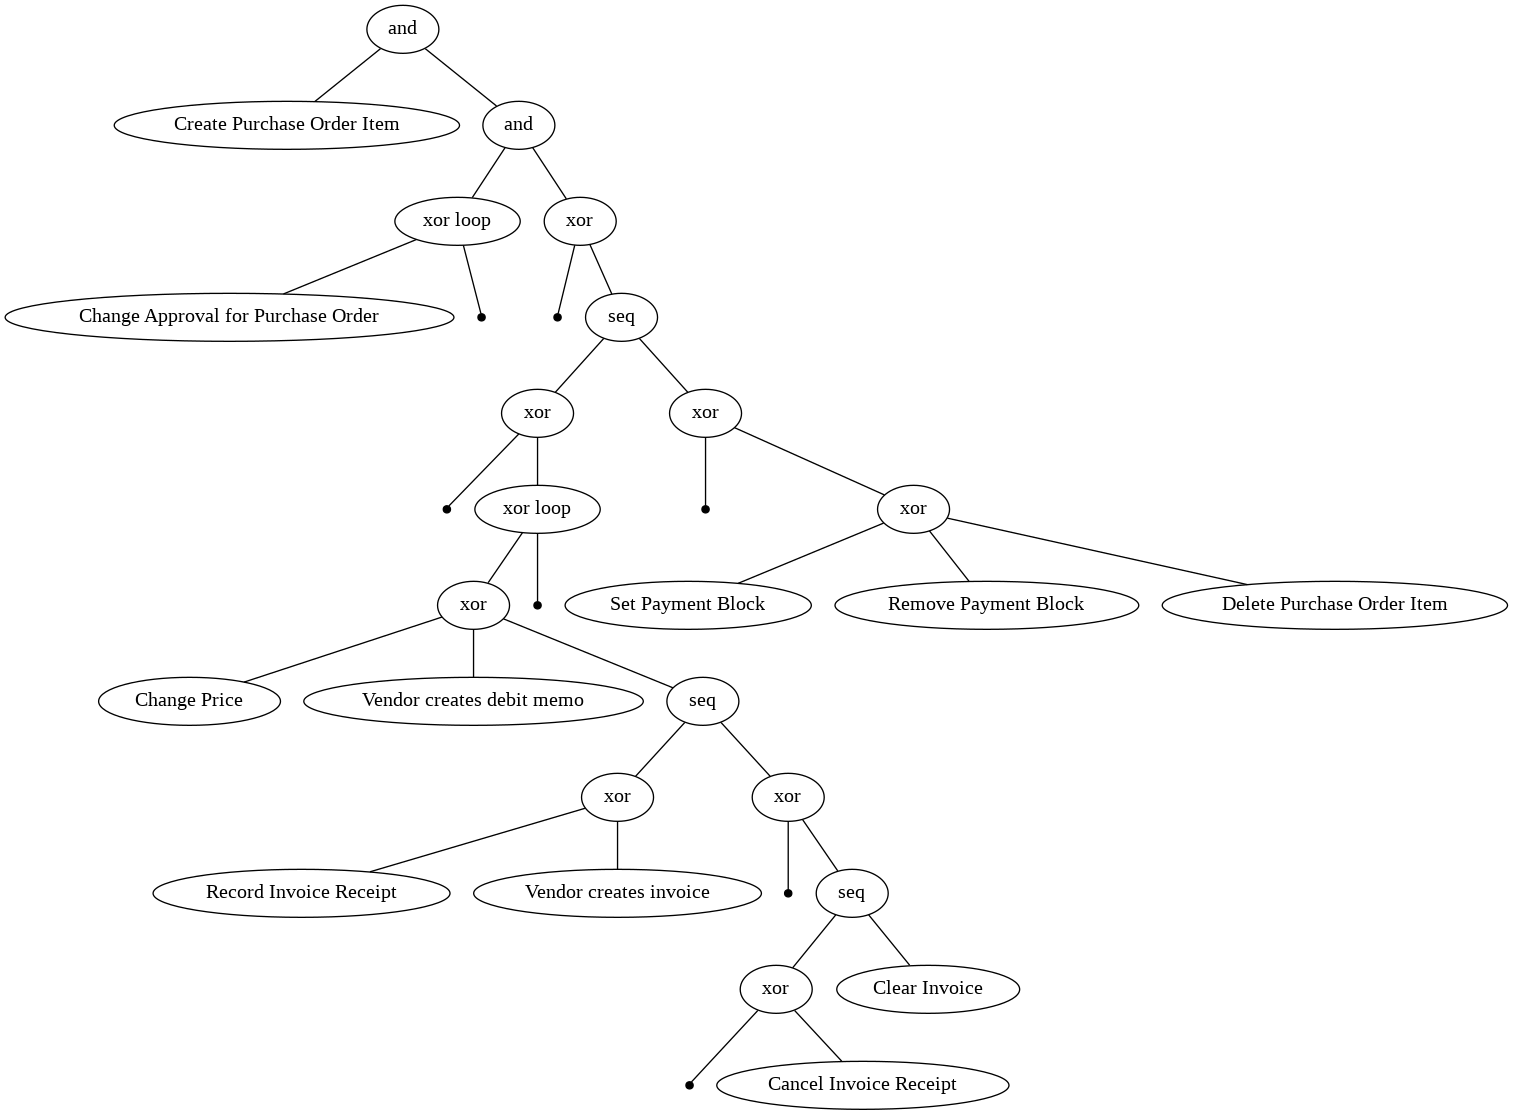

In [ ]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
# Discover process tree using inductive miner
tree = inductive_miner.apply(filtered_log)


from pm4py.visualization.process_tree import visualizer as pt_visualizer
gviz = pt_visualizer.apply(tree, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/147 [00:00<?, ?it/s]

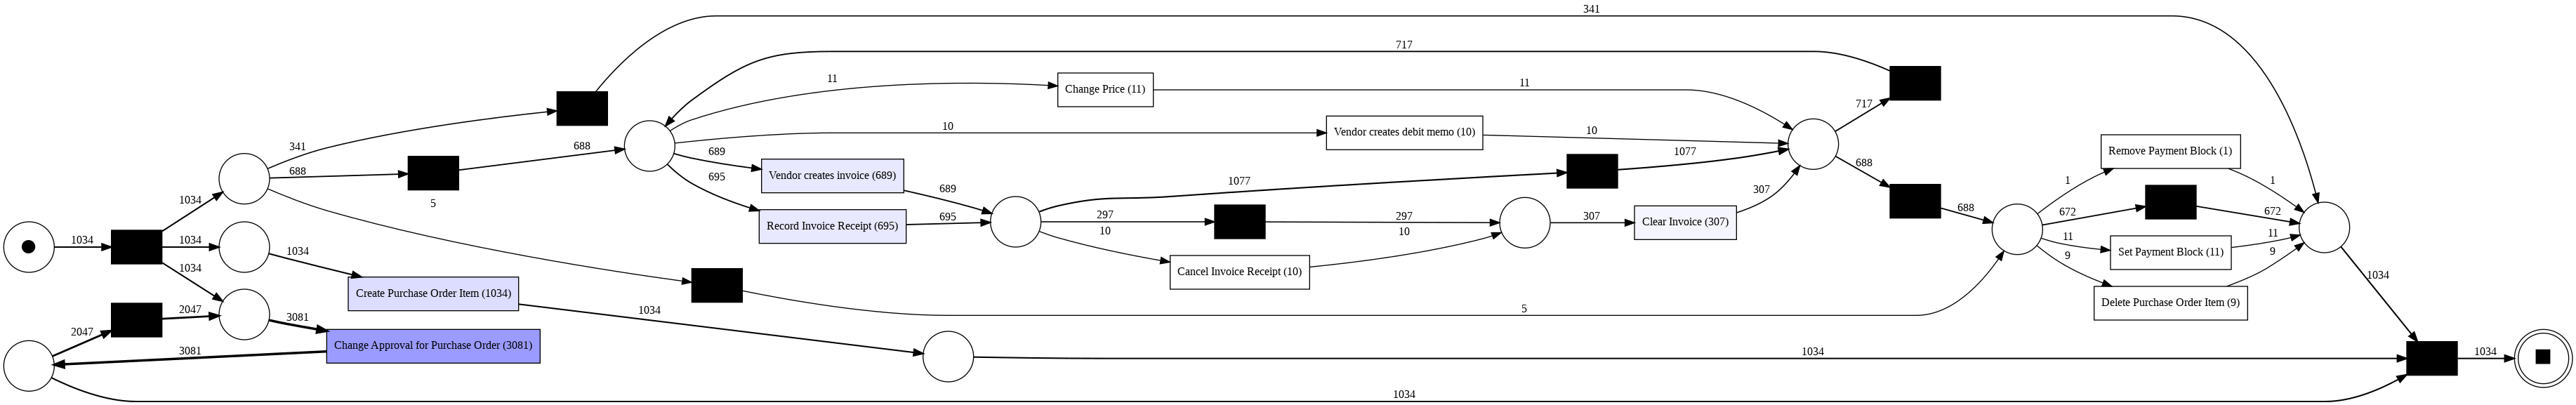

In [ ]:

from pm4py.objects.conversion.process_tree import converter as pt_converter
net, initial_marking, final_marking = pt_converter.apply(tree)
## Then visualise
gviz = pn_visualizer.apply(net, initial_marking, final_marking,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=filtered_log)
pn_visualizer.view(gviz)

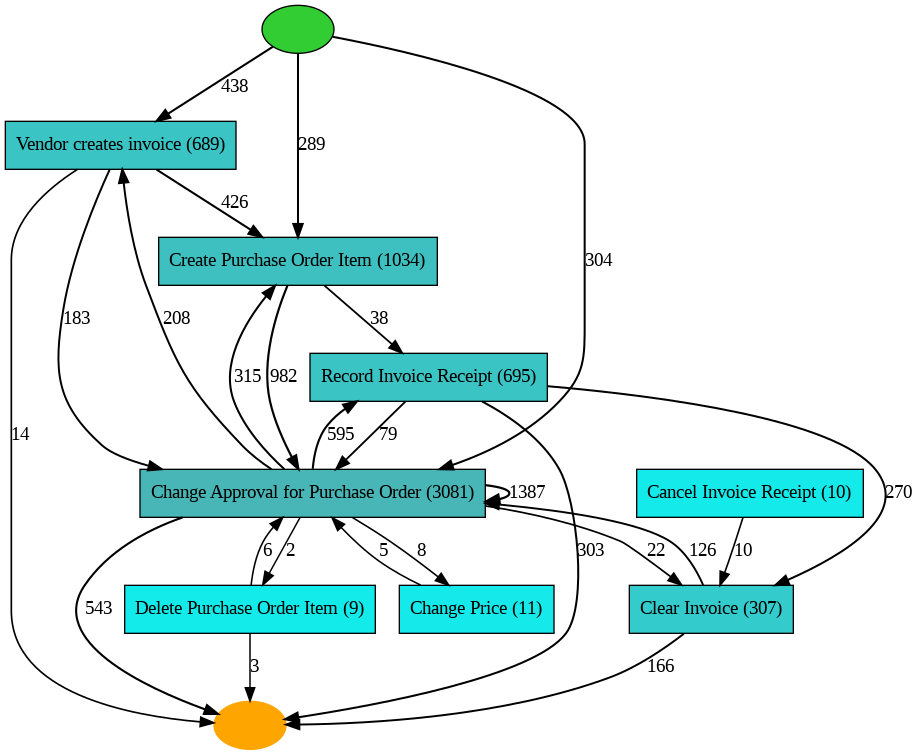

In [ ]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
net = heuristics_miner.apply_heu(filtered_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.9})
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
gviz = hn_visualizer.apply(net)
hn_visualizer.view(gviz)

In [ ]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_algorithm
#from pm4py.algo.discovery.fuzzy import algorithm as fuzzy_miner
#from pm4py.algo.discovery.genetic import algorithm as genetic_miner
#from pm4py.algo.discovery.split import algorithm as split_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer

# Mount Google Drive
drive.mount('/content/drive')

file_name = 'exported.xes'
file_path = f'/content/drive/MyDrive/files/{file_name}'

# Read the event log from the file
log = xes_importer.apply(file_path)

# Apply Alpha Miner
net_alpha, initial_marking_alpha, final_marking_alpha = alpha_miner.apply(log)

# Apply Inductive Miner
net_inductive, initial_marking_inductive, final_marking_inductive = inductive_miner.apply(log)

# Apply Heuristics Miner
net_heuristics, initial_marking_heuristics, final_marking_heuristics = heuristics_miner.apply(log)

# Calculate the Directly-Follows Graph (DFG)
dfg = dfg_algorithm.apply(log)

# Apply Fuzzy Miner
#net_fuzzy, initial_marking_fuzzy, final_marking_fuzzy = fuzzy_miner.apply(log, dfg=dfg)

# Apply Genetic Miner
#net_genetic, initial_marking_genetic, final_marking_genetic = genetic_miner.apply(log)

# Apply Split Miner
#net_split, initial_marking_split, final_marking_split = split_miner.apply(log)

# Visualize process tree for Alpha Miner
tree_alpha = pt_visualizer.apply(net_alpha)
pt_visualizer.view(tree_alpha)

# Visualize process tree for Inductive Miner
tree_inductive = pt_visualizer.apply(net_inductive)
pt_visualizer.view(tree_inductive)

# Visualize process tree for Heuristics Miner
tree_heuristics = pt_visualizer.apply(net_heuristics)
pt_visualizer.view(tree_heuristics)

# Visualize process tree for Fuzzy Miner
#tree_fuzzy = pt_visualizer.apply(net_fuzzy)
#pt_visualizer.view(tree_fuzzy)

# Visualize process tree for Genetic Miner
#tree_genetic = pt_visualizer.apply(net_genetic)
#pt_visualizer.view(tree_genetic)

# Visualize process tree for Split Miner
#tree_split = pt_visualizer.apply(net_split)
#pt_visualizer.view(tree_split)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


parsing log, completed traces ::   0%|          | 0/251734 [00:00<?, ?it/s]

TypeError: ignored

In [ ]:
from pm4py.statistics.traces.log import case_statistics

# Evaluate process performance metrics
cycle_time = case_statistics.get_average_case_duration(log)
throughput = case_statistics.get_cases_per_time_unit(log)
bottlenecks = case_statistics.get_case_attribute_values(log, "concept:name")

print("Average cycle time:", cycle_time)
print("Throughput:", throughput)
print("Bottlenecks:", bottlenecks)

ModuleNotFoundError: ignored

# New Section